<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>  

1. <a href="#item41">Download Data</a>
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here:

https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [1]:
!rm -rf data
# get the data
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip -P data/

--2021-01-10 19:04:01--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Date: Sun, 10 Jan 2021 18:04:02 GMT
  X-Clv-Request-Id: cd1bb55a-1b51-44a4-8bfb-3302e1bcbdad
  Server: Cleversafe
  X-Clv-S3-Version: 2.5
  Accept-Ranges: bytes
  x-amz-request-id: cd1bb55a-1b51-44a4-8bfb-3302e1bcbdad
  x-amz-mp-parts-count: 25
  ETag: "84d9d4d373f9778a4b06bbf29619dd86-25"
  Content-Type: application/zip
  Last-Modified: Mon, 13 Jan 2020 18:34:51 GMT
  Content-Length: 261483817
Length: 261483817 (249M) [application/zip]
Saving to: ‘data/concrete_data_week4.zip’

concrete_data_week4 100%[===================>] 249.37M   759KB/

In [2]:
!unzip data/concrete_data_week4.zip -d data/

OSX/concrete_data_week4/train/negative/._08761.jpg  
  inflating: data/concrete_data_week4/train/negative/13427.jpg  
  inflating: data/__MACOSX/concrete_data_week4/train/negative/._13427.jpg  
  inflating: data/concrete_data_week4/train/negative/03634.jpg  
  inflating: data/__MACOSX/concrete_data_week4/train/negative/._03634.jpg  
  inflating: data/concrete_data_week4/train/negative/14348.jpg  
  inflating: data/__MACOSX/concrete_data_week4/train/negative/._14348.jpg  
  inflating: data/concrete_data_week4/train/negative/12739.jpg  
  inflating: data/__MACOSX/concrete_data_week4/train/negative/._12739.jpg  
  inflating: data/concrete_data_week4/train/negative/05245.jpg  
  inflating: data/__MACOSX/concrete_data_week4/train/negative/._05245.jpg  
  inflating: data/concrete_data_week4/train/negative/13433.jpg  
  inflating: data/__MACOSX/concrete_data_week4/train/negative/._13433.jpg  
  inflating: data/concrete_data_week4/train/negative/03620.jpg  
  inflating: data/__MACOSX/concrete_

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

In [3]:
# delete some useless files from unzip
!find . -name ".DS_Store" -print -delete
!find . -name ".ipynb_checkpoints" -type d -exec rm -rf "{}" \;

./data/concrete_data_week4/train/negative/.DS_Store
./data/concrete_data_week4/train/.DS_Store
./data/concrete_data_week4/train/positive/.DS_Store
./data/concrete_data_week4/.DS_Store
./data/concrete_data_week4/test/.DS_Store
./data/concrete_data_week4/valid/negative/.DS_Store
./data/concrete_data_week4/valid/.DS_Store
./data/concrete_data_week4/valid/positive/.DS_Store
find: ‘./data/concrete_data_week4/train/negative/.ipynb_checkpoints’: No such file or directory
find: ‘./data/concrete_data_week4/valid/negative/.ipynb_checkpoints’: No such file or directory


In [4]:
test_dir = 'data/concrete_data_week4/test'
train_dir = 'data/concrete_data_week4/train'
val_dir = 'data/concrete_data_week4/valid'


## General imports

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input as preprocess_vgg_input

Use the following cells to create your classifier.

In [7]:
# model parameters as described above
N_classes = 2
batch_size = 100
image_size = 224

In [8]:
vggdta_generator = ImageDataGenerator(
    preprocessing_function=preprocess_vgg_input,
)

In [9]:
# Train set for the VGG16 model
train_generator = vggdta_generator.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 30000 images belonging to 2 classes.


In [10]:
# Validation set for the VGG16 model
val_generator = vggdta_generator.flow_from_directory(
    val_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 9500 images belonging to 2 classes.


In [11]:
vggmodel = Sequential()
vggmodel.add(VGG16(include_top=False, pooling='avg', weights='imagenet'))
vggmodel.add(Dense(N_classes, activation='softmax'))

vggmodel.layers[0].trainable = False

vggmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
vggmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Because fitting the model takes quite a while, we will skip the next 3 cells and load the already fitted model from previous runs of these cells... 

In [13]:
%%script false --no-raise-error

# fit_generator method is deprecated, using equivalent fit method instead
vggfit_history = vggmodel.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=2,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    verbose=1)

vggfit_history = vggfit_history.history
vggfit_history

In [14]:
%%script false --no-raise-error

import pickle

with open('vggfit_history.pkl', 'wb') as f:
    pickle.dump(vggfit_history, f)

In [15]:
%%script false --no-raise-error

vggmodel.save('classifier_vgg_model.h5')

In [16]:
vggmodel = load_model('classifier_vgg_model.h5')

In [17]:
import pickle

with open('vggfit_history.pkl', 'rb') as f:
    vggfit_history = pickle.load(f)

vggfit_history

{'loss': [0.11274377256631851, 0.022148646414279938],
 'accuracy': [0.9634333252906799, 0.995199978351593],
 'val_loss': [0.028366727754473686, 0.01685412973165512],
 'val_accuracy': [0.9945263266563416, 0.9964210391044617]}

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [18]:
from keras.applications.resnet50 import preprocess_input as preprocess_resnet_input

In [19]:
# Create test set generator for the Resent50 model as described above
resnetdta_generator = ImageDataGenerator(
    preprocessing_function=preprocess_resnet_input)

resnettest_generator = resnetdta_generator.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    shuffle=False)


Found 500 images belonging to 2 classes.


In [20]:
# Create test set generator for the VGG16 model as described above
vggtest_generator = vggdta_generator.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    shuffle=False)

Found 500 images belonging to 2 classes.


In [21]:
# load the previously saved Resnet50 model
resnetmodel = load_model('classifier_resnet_model.h5')

In [22]:
# evaluate_generator method is deprecated, using equivalent evaluate method instead
resnet_eval = resnetmodel.evaluate(resnettest_generator, verbose=1)
print("Evaluation loss:\t{:8.6f}\nEvaluation accuracy:\t{:8.6f}".format(*resnet_eval))

16/16 [==============================] - 15s 925ms/step - loss: 0.0038 - accuracy: 1.0000
Evaluation loss:	0.003769
Evaluation accuracy:	1.000000


In [23]:
# evaluate_generator method is deprecated, using equivalent evaluate method instead
vgg_eval = vggmodel.evaluate(vggtest_generator, verbose=1)
print("Evaluation loss:\t{:8.6f}\nEvaluation accuracy:\t{:8.6f}".format(*vgg_eval))

16/16 [==============================] - 36s 2s/step - loss: 0.0150 - accuracy: 0.9960
Evaluation loss:	0.014987
Evaluation accuracy:	0.996000


## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [24]:
# get predictions from the Resnet50 model
resnet_pred = resnetmodel.predict(resnettest_generator, verbose=1)
yhat_resnet = resnet_pred.argmax(1)

16/16 [==============================] - 14s 849ms/step


In [25]:
# get predictions from the VGG16 model
vgg_pred = vggmodel.predict(vggtest_generator, verbose=1)
yhat_vgg = resnet_pred.argmax(1)

16/16 [==============================] - 35s 2s/step


In [26]:
# Custom image transform for plotting
def img_clip(img):
    img = 1./255 * img
    img[img < 0] = 0
    img[img > 1] = 1
    return img

In [27]:
# The same test set generator, but with batch size 1
resnettest_generator = resnetdta_generator.flow_from_directory(
    test_dir,
    batch_size=1,
    target_size=(image_size, image_size),
    shuffle=False)

Found 500 images belonging to 2 classes.


Resnet50 predictions



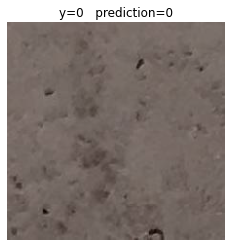

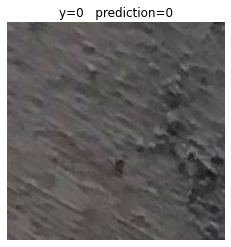

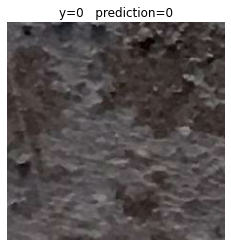

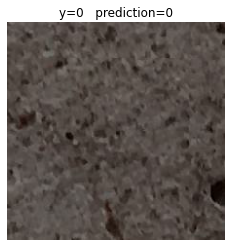

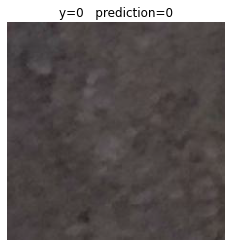

In [28]:
# Inspect images, labels, and their predictions
print("Resnet50 predictions\n")

resnettest_generator.reset()
for i, sample in enumerate(resnettest_generator):
    if i == 5:
        break

    img = img_clip(sample[0][0])
    y = sample[1].argmax(1)[0]
    yhat = yhat_resnet[i]

    plt.imshow(img)
    plt.axis('off')
    plt.title("y={}   prediction={}".format(y, yhat))
    plt.show()


In [29]:
# Print out predictions as asked
# because the instructions were to set shuffle=False,
# the first half of all images are Negative, the other half Positive!
print("Resnet50 predictions")
resnettest_generator.reset()
for i, sample in enumerate(resnettest_generator):
    if i == 5:
        break

    y = sample[1].argmax(1)[0]
    yhat = yhat_resnet[i]
    y_class = 'Positive' if y else 'Negative'
    yhat_class = 'Positive' if yhat else 'Negative'
    print(yhat_class)


Resnet50 predictions
Negative
Negative
Negative
Negative
Negative


In [30]:
# The same test set generator, but with batch size 1
vggtest_generator = vggdta_generator.flow_from_directory(
    test_dir,
    batch_size=1,
    target_size=(image_size, image_size),
    shuffle=False)

Found 500 images belonging to 2 classes.


VGG16 predictions



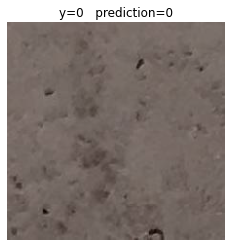

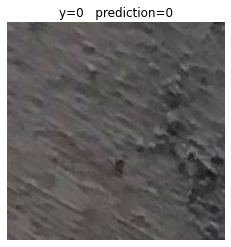

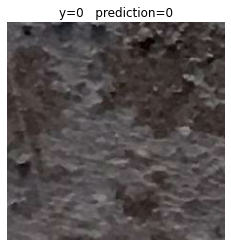

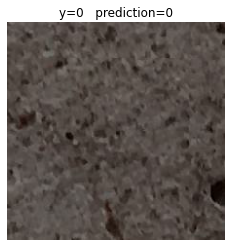

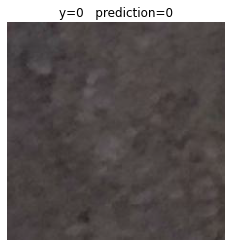

In [31]:
# Inspect images, labels, and their predictions
print("VGG16 predictions\n")

vggtest_generator.reset()
for i, sample in enumerate(vggtest_generator):
    if i == 5:
        break

    img = img_clip(sample[0][0])
    y = sample[1].argmax(1)[0]
    yhat = yhat_vgg[i]

    plt.imshow(img)
    plt.axis('off')
    plt.title("y={}   prediction={}".format(y, yhat))
    plt.show()


In [32]:
# Print out predictions as asked
# because the instructions were to set shuffle=False,
# the first half of all images are Negative, the other half Positive!
print("VGG16 predictions")
vggtest_generator.reset()
for i, sample in enumerate(vggtest_generator):
    if i == 5:
        break

    y = sample[1].argmax(1)[0]
    yhat = yhat_vgg[i]
    y_class = 'Positive' if y else 'Negative'
    yhat_class = 'Positive' if yhat else 'Negative'
    print(yhat_class)

VGG16 predictions
Negative
Negative
Negative
Negative
Negative


### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).